# Projeto 002/100 - Análise da População Mundial com Machine Learning!

Este projeto realiza uma análise da população mundial ao longo do tempo e
prevê populações futuras usando regressão linear.

Criado por **Otávio Lira Neves**

Email: otavioliraneves@gmail.com

Linkedin: https://www.linkedin.com/in/otavioliraneves/

# Instalação das bibliotecas

In [3]:
!pip install datacleaner numpy pandas matplotlib seaborn scikit-learn

  Using cached datacleaner-0.1.5.tar.gz (6.5 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for datacleaner: filename=datacleaner-0.1.5-py3-none-any.whl size=7408 sha256=7f09440fcf0c28e81346a39a827380fd8a5b711fd074538c2e7058420245294b
  Stored in directory: /root/.cache/pip/wheels/e1/09/72/c85c045c414d1fa393e6845da43f5b2a1a3865d3ce5bbedabc
Successfully built datacleaner


In [4]:
# Imports Essenciais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datacleaner
from datacleaner import autoclean

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# Configuração para suprimir avisos
import warnings
warnings.filterwarnings('ignore')

# Coleta e limpeza dos dados

In [6]:
# Carregar os dados
df = pd.read_csv("world_population.csv")

df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [7]:
# Visualizar informações gerais sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [8]:
# Estatísticas descritivas do dataset
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


In [9]:
# Verificação de dados ausentes e duplicados
print("Quantidade de dados nulos nas colunas:\n", df.isnull().sum())
print("Quantidade de dados duplicados:", df.duplicated().sum())
print("Verificando dados faltantes\n", round((df.isnull().sum()/df.shape[0])*100,2))

# preenchendo dados faltantes
# dataset.fillna(dataset.mean(), inplace=True)

# para colunas categoricas
# categorical_columns = dataset.select_dtypes(include=['object']).columns
# for column in categorical_columns:
    #dataset[column].fillna(dataset[column].mode()[0], inplace=True)


Quantidade de dados nulos nas colunas:
 Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64
Quantidade de dados duplicados: 0
Verificando dados faltantes
 Rank                           0.0
CCA3                           0.0
Country/Territory              0.0
Capital                        0.0
Continent                      0.0
2022 Population                0.0
2020 Population                0.0
2015 Population                0.0
2010 Population                0.0
2000 Pop

Insights

* Não possui nenhum dado vazio, dataset muito bem limpo

# Exploração dos dados

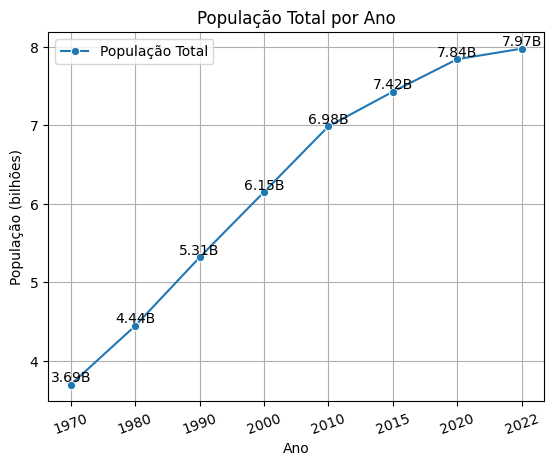

In [10]:
# Criar colunas de população por ano e calcular população total
years = ["1970","1980","1990","2000","2010","2015","2020","2022"]
columns = [f"{year} Population" for year in years]

# Soma da população de todos os países por ano
total_population = [df[column].sum() / 1e9 for column in columns]

# Gráfico: População Total por Ano
# Adicionar anotações nos pontos dos gráficos
for i, value in enumerate(total_population):
  plt.text(i, value, f"{value:.2f}B", ha='center', va='bottom')

# Criar o gráfico - População
sns.lineplot(x=years, y=total_population, marker='o', label='População Total')
plt.title('População Total por Ano')
plt.xlabel('Ano')
plt.ylabel('População (bilhões)')
plt.xticks(rotation=20)
plt.grid(True)
plt.show()

In [11]:
# Gráfico: Distribuição da população por continente (2022)
continent_df = df.groupby(by="Continent").sum()
continent_df

,Rank,CCA3,Country/Territory,Capital,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,,,,,,,,,,,,,,,,
Africa,5253,DZAAGOBENBWABFABDICMRCPVCAFTCDCOMDJICODEGYGNQE...,AlgeriaAngolaBeninBotswanaBurkina FasoBurundiC...,AlgiersLuandaPorto-NovoGaboroneOuagadougouBuju...,1426730932,1360671810,1201102442,1055228072,818946032,638150629,481536377,365444348,30317963,7127.7158,58.2109,17.87
Asia,3878,AFGARMAZEBHRBGDBTNBRNKHMCHNGEOHKGINDIDNIRNIRQI...,AfghanistanArmeniaAzerbaijanBahrainBangladeshB...,KabulYerevanBakuManamaDhakaThimphuBandar Seri ...,4721383274,4663086535,4458250182,4220041327,3735089604,3210563577,2635334228,2144906290,32138141,51251.2068,50.4692,59.19
Europe,6225,ALBANDAUTBLRBELBIHBGRHRVCYPCZEDNKESTFROFINFRAD...,AlbaniaAndorraAustriaBelarusBelgiumBosnia and ...,TiranaAndorra la VellaViennaMinskBrusselsSaraj...,743147538,745792196,741535608,735613934,726093423,720320797,692527159,655923991,23010411,33166.2371,50.1128,9.33
North America,6437,AIAATGABWBHSBRBBLZBMUVGBCANCYMCRICUBCUWDMADOMS...,AnguillaAntigua and BarbudaArubaBahamasBarbado...,The ValleySaint John’sOranjestadNassauBridgeto...,600296136,594236593,570383850,542720651,486069584,421266425,368293361,315434606,24244178,10910.4703,40.1670,7.51
Oceania,4336,ASMAUSCOKFJIPYFGUMKIRMHLFSMNRUNCLNZLNIUNFKPLWP...,American SamoaAustraliaCook IslandsFijiFrench ...,Pago PagoCanberraAvaruaSuvaPapeeteHagåtñaTaraw...,45038554,43933426,40403283,37102764,31222778,26743822,22920240,19480270,8515081,3048.4905,23.1698,0.55
South America,1366,ARGBOLBRACHLCOLECUFLKGUFGUYPRYPERSURURYVEN,ArgentinaBoliviaBrazilChileColombiaEcuadorFalk...,Buenos AiresSucreBrasiliaSantiagoBogotaQuitoSt...,436816608,431530043,413134396,393078250,349634282,297146415,241789006,192947156,17833382,293.6077,14.1114,5.48


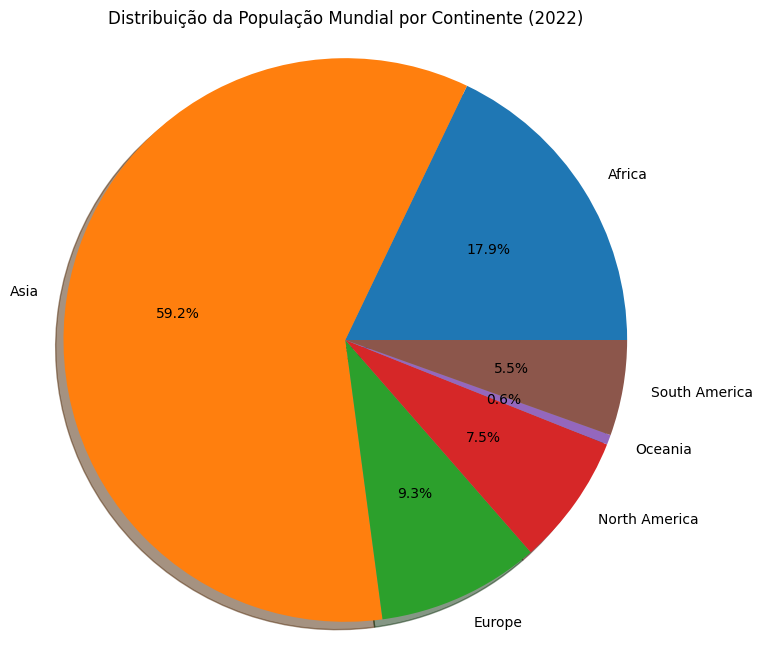

In [12]:
continent_df["2022 Population"].plot(kind="pie", figsize=(8,8), autopct="%1.1f%%", shadow=True)
plt.title("Distribuição da População Mundial por Continente (2022)")
plt.axis("equal")
plt.ylabel("")  # Remover rótulo automático
plt.show()

In [13]:
# Criando data frames para cada pais por continente
africa_df = df.loc[df["Continent"] == "Africa"].sort_values(by="2022 Population", ascending=False, ignore_index=True)
asia_df = df.loc[df["Continent"] == "Asia"].sort_values(by="2022 Population", ascending=False, ignore_index=True)
europe_df = df.loc[df["Continent"] == "Europe"].sort_values(by="2022 Population", ascending=False, ignore_index=True)
north_america_df = df.loc[df["Continent"] == "North America"].sort_values(by="2022 Population", ascending=False, ignore_index=True)
oceania_df = df.loc[df["Continent"] == "Oceania"].sort_values(by="2022 Population", ascending=False, ignore_index=True)
south_america_df = df.loc[df["Continent"] == "South America"].sort_values(by="2022 Population", ascending=False, ignore_index=True)

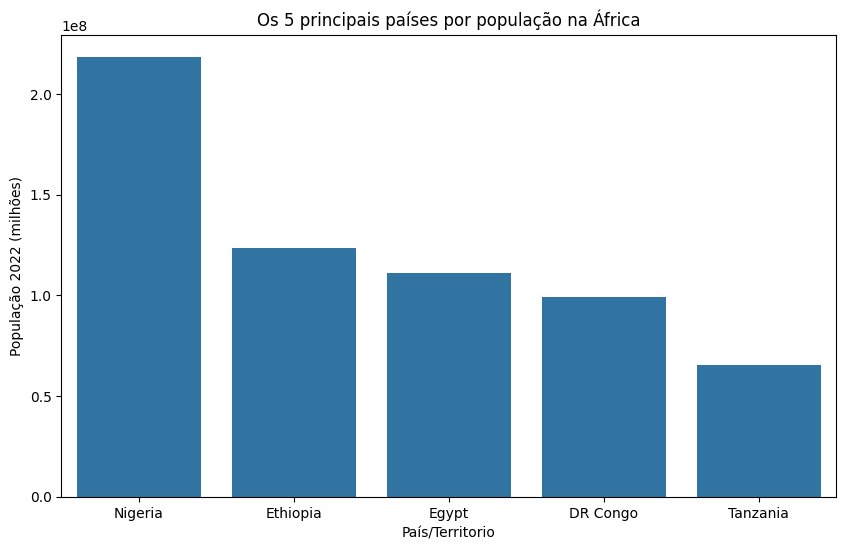

In [14]:
# Gráficos de 5 países mais populados por continente

# Africa
top_5_countries = africa_df[["Country/Territory", "2022 Population"]].sort_values(by="2022 Population", ascending=False).head(5)

plt.figure(figsize=(10, 6))

sns.barplot(data=top_5_countries, x="Country/Territory", y="2022 Population")
plt.xlabel("País/Territorio")
plt.ylabel("População 2022 (milhões)")
plt.title("Os 5 principais países por população na África")
plt.show()

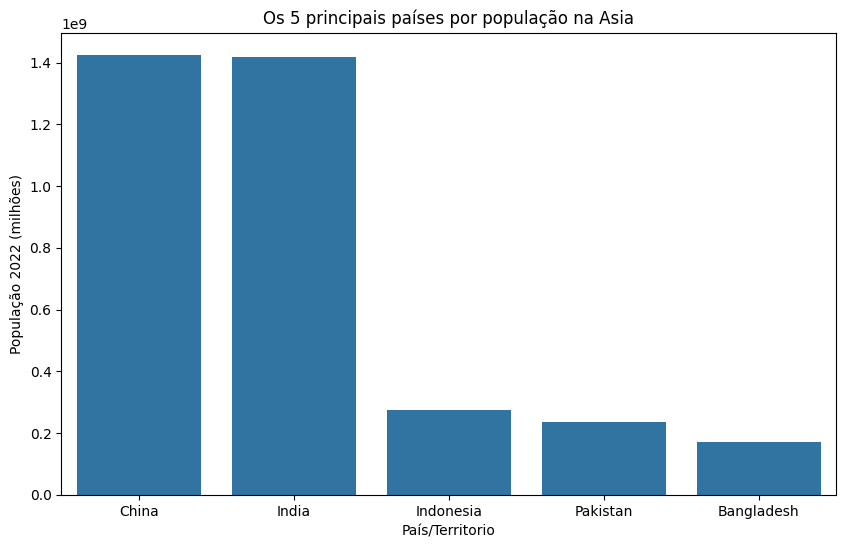

In [15]:
# Asia
top_5_countries = asia_df[["Country/Territory", "2022 Population"]].sort_values(by="2022 Population", ascending=False).head(5)
plt.figure(figsize=(10, 6))

sns.barplot(data=top_5_countries, x="Country/Territory", y="2022 Population")
plt.xlabel("País/Territorio")
plt.ylabel("População 2022 (milhões)")
plt.title("Os 5 principais países por população na Asia")
plt.show()

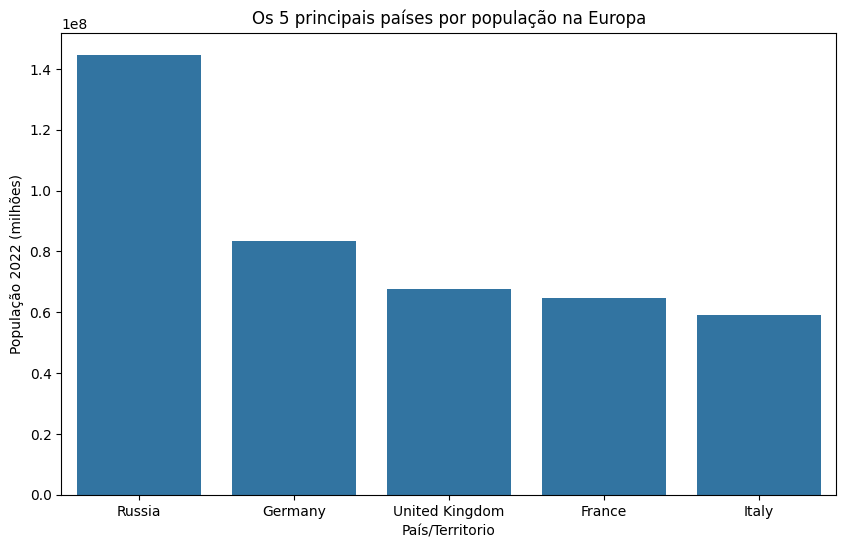

In [16]:
# Europa
top_5_countries = europe_df[["Country/Territory", "2022 Population"]].sort_values(by="2022 Population", ascending=False).head(5)
plt.figure(figsize=(10, 6))

sns.barplot(data=top_5_countries, x="Country/Territory", y="2022 Population")
plt.xlabel("País/Territorio")
plt.ylabel("População 2022 (milhões)")
plt.title("Os 5 principais países por população na Europa")
plt.show()

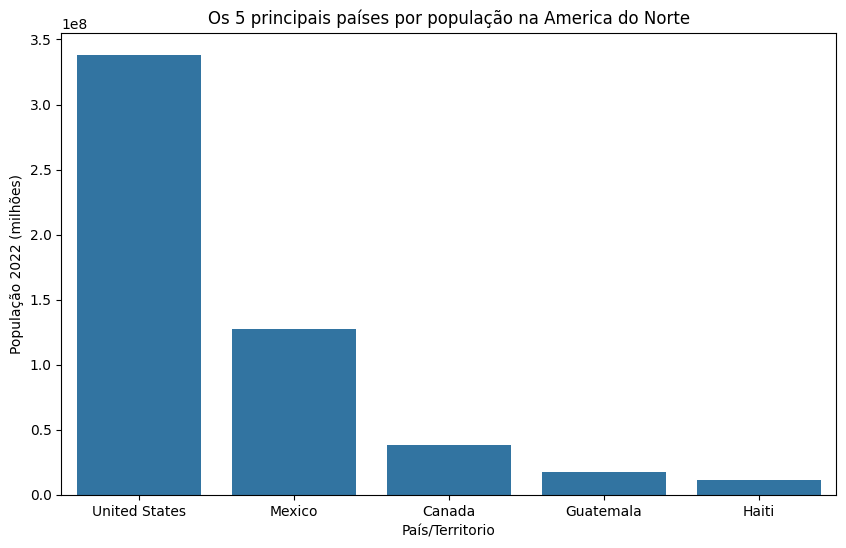

In [17]:
# America do Norte
top_5_countries = north_america_df[["Country/Territory", "2022 Population"]].sort_values(by="2022 Population", ascending=False).head(5)
plt.figure(figsize=(10, 6))

sns.barplot(data=top_5_countries, x="Country/Territory", y="2022 Population")
plt.xlabel("País/Territorio")
plt.ylabel("População 2022 (milhões)")
plt.title("Os 5 principais países por população na America do Norte")
plt.show()

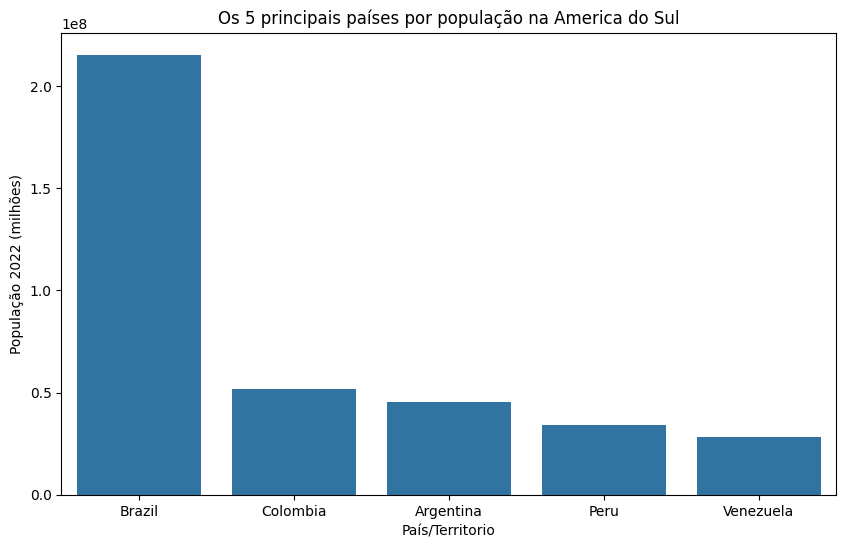

In [18]:
# America do Sul
top_5_countries = south_america_df[["Country/Territory", "2022 Population"]].sort_values(by="2022 Population", ascending=False).head(5)
plt.figure(figsize=(10, 6))

sns.barplot(data=top_5_countries, x="Country/Territory", y="2022 Population")
plt.xlabel("País/Territorio")
plt.ylabel("População 2022 (milhões)")
plt.title("Os 5 principais países por população na America do Sul")
plt.show()

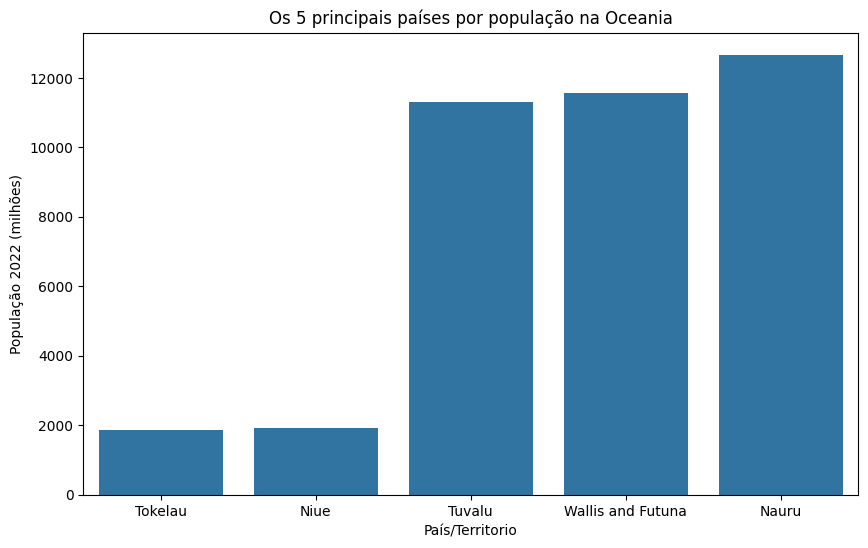

In [19]:
# Oceania
top_5_countries = oceania_df[["Country/Territory", "2022 Population"]].sort_values(by="2022 Population", ascending=True).head(5)
plt.figure(figsize=(10, 6))

sns.barplot(data=top_5_countries, x="Country/Territory", y="2022 Population")
plt.xlabel("País/Territorio")
plt.ylabel("População 2022 (milhões)")
plt.title("Os 5 principais países por população na Oceania")
plt.show()

# Regressão Linear para Previsão de População


In [20]:
# Limpeza automática do dataset para regressão linear
df = autoclean(df)
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,1,0,89,1,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,4,1,211,2,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,57,2,4,0,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,9,3,150,4,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,5,4,8,2,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [21]:
# Previsão baseada nos anos e população total
X = df.drop("World Population Percentage", axis = 1)
y = df["World Population Percentage"]

# Divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
# Treinar o modelo de regressão linear
lr = LinearRegression()
lr.fit(X_train, y_train)

# Prever populações futuras
cv_predictions = lr.predict(X_test)
cv_mse = mean_squared_error(y_test, cv_predictions)
print(f"Cross-Validation Mean Squared Error: {cv_mse:.4f}")

Cross-Validation Mean Squared Error: 0.0000


In [23]:
# Calcular R-quadrado (Coeficiente de Determinação
r2 = r2_score(y_test, cv_predictions)
print(f"R-squared: {r2:.4f}")

R-squared: 1.0000


In [24]:
# Crie um DataFrame com valores reais e previstos
results_df = pd.DataFrame({
    'Actual Values': y_test.values,
    'Predicted Values': cv_predictions})

results_df.head(10)

,Actual Values,Predicted Values
0,0.00,0.004022
1,0.90,0.898280
2,0.00,-0.000507
3,0.03,0.035026
4,0.00,0.004114
5,0.08,0.082908
6,0.60,0.597566
7,3.45,3.454618
8,1.07,1.069222
9,0.02,0.018548


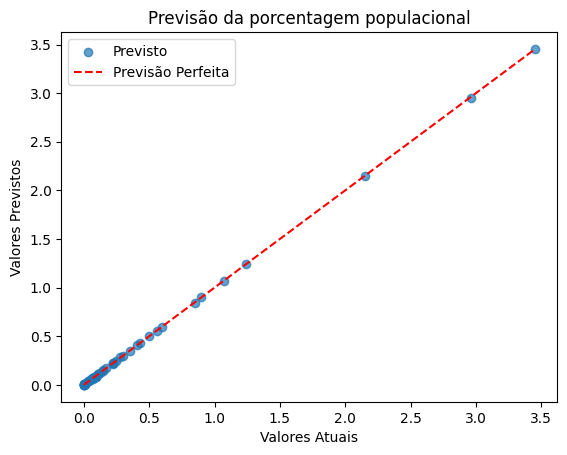

In [25]:
# Visualizar a previsão
plt.scatter(y_test, cv_predictions, alpha=0.7, label='Previsto')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Previsão Perfeita')
plt.xlabel('Valores Atuais')
plt.ylabel('Valores Previstos')
plt.title('Previsão da porcentagem populacional')
plt.legend()
plt.show()

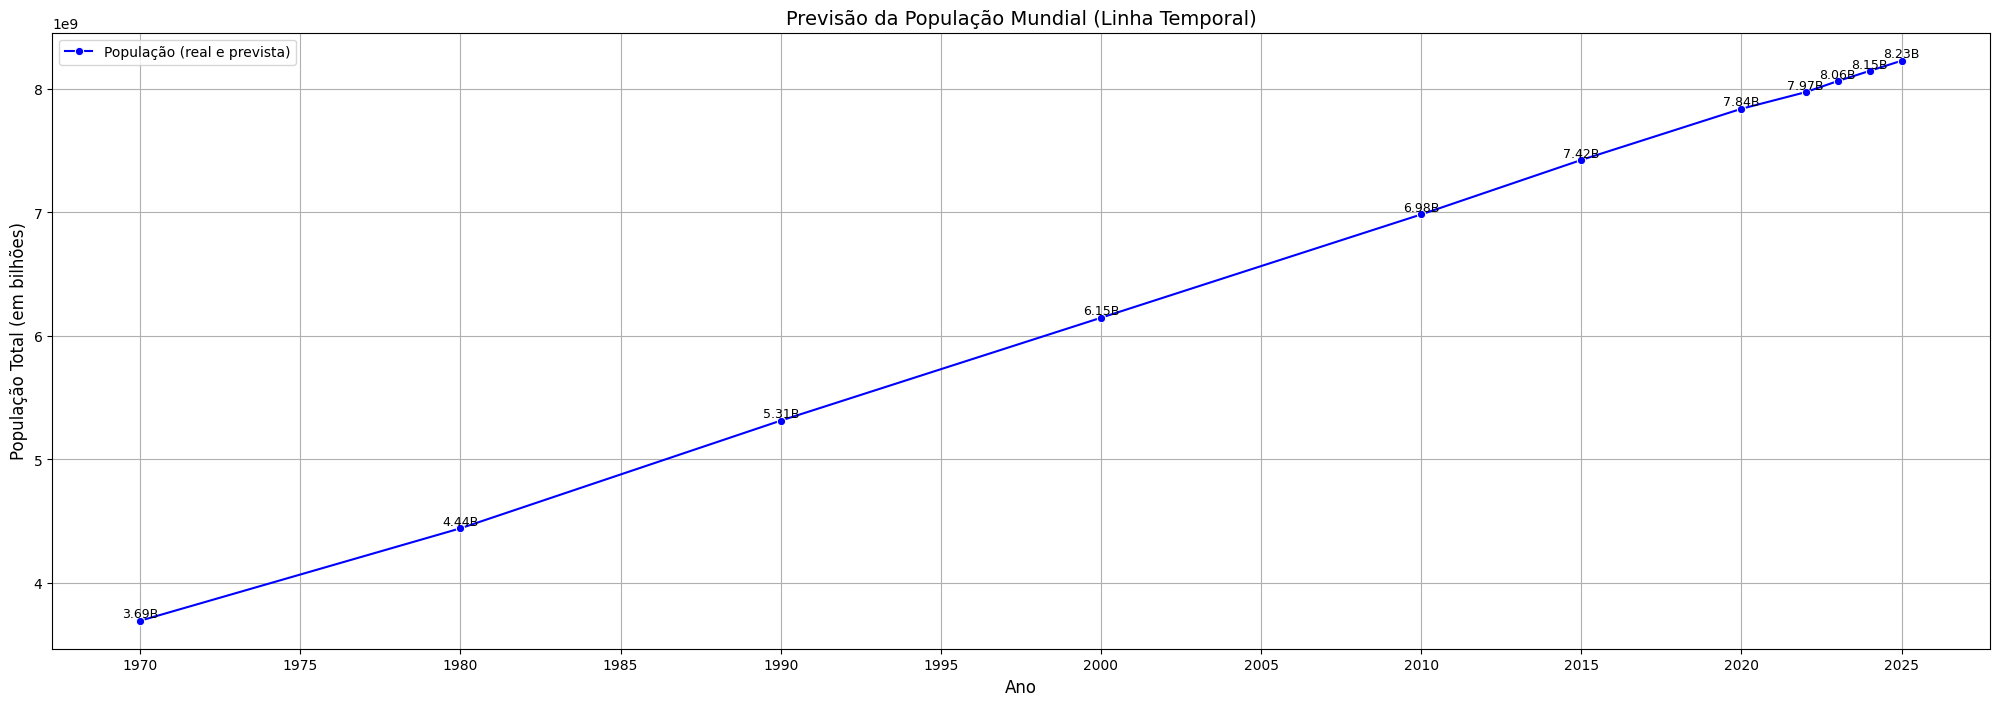

In [26]:
# Coletar dados de anos anteriores e populações totais
years = ["1970", "1980", "1990", "2000", "2010", "2015", "2020", "2022"]
columns = [f"{year} Population" for year in years]

# Extrair anos e populações totais (somando as populações de todos os países)
year_numbers = np.array([int(year) for year in years]).reshape(-1, 1)
total_population = [df[column].sum() for column in columns]

# Treinar modelo de regressão linear
X_train, X_test, y_train, y_test = train_test_split(year_numbers, total_population, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

# Prever populações futuras
future_years = np.array([2023, 2024, 2025]).reshape(-1, 1)
predicted_population = lr.predict(future_years)

# Unir os dados históricos e as previsões
all_years = np.concatenate([year_numbers.flatten(), future_years.flatten()])
all_population = np.concatenate([total_population, predicted_population])

# Visualizar a linha temporal
plt.figure(figsize=(25, 8))
sns.lineplot(x=all_years, y=all_population, marker='o', label='População (real e prevista)', color='blue')

# Adicionar marcações para os dados reais e previsões
for year, pop in zip(all_years, all_population):
    plt.text(year, pop, f"{pop / 1e9:.2f}B", ha='center', va='bottom', fontsize=9)

plt.title('Previsão da População Mundial (Linha Temporal)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('População Total (em bilhões)', fontsize=12)
plt.grid(True)
plt.xticks(np.arange(1970, 2026, step=5))
plt.legend()
plt.show()

# Conclusão

Segundo as métricas ao vivo do site worldometer, a população mundial chegou a 8 bilhões em 2022, e na data atual (20/01/2025), estamos com mais de 8,201 Bilhões pessoas no mundo. A machine learning conseguiu prever valores aproximados, 8,06B em 2022 e 8,230 para 2025

Esse código demonstra como a machine learning pode nos auxiliar com a previsão de dados utilizando os dados que temos como base, chegando a resultados bem pertos do real

# Referências
## https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset
## https://www.kaggle.com/code/hasibalmuzdadid/world-population-analysis
## https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset/data
## https://www.worldometers.info/